In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from Utilities.model import Net1
from Utilities.utils import train, test
import torch.nn.functional as F
from torchsummary import summary

torch.manual_seed(1)

In [34]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [35]:
device = torch.device("mps")
model = Net1()
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
            Conv2d-4           [-1, 10, 24, 24]             910
              ReLU-5           [-1, 10, 24, 24]               0
       BatchNorm2d-6           [-1, 10, 24, 24]              20
            Conv2d-7           [-1, 11, 22, 22]           1,001
              ReLU-8           [-1, 11, 22, 22]               0
       BatchNorm2d-9           [-1, 11, 22, 22]              22
           Conv2d-10           [-1, 10, 11, 11]             120
           Conv2d-11             [-1, 10, 9, 9]             910
             ReLU-12             [-1, 10, 9, 9]               0
      BatchNorm2d-13             [-1, 10, 9, 9]              20
           Conv2d-14             [-1, 1

In [36]:
from Utilities.transforms import train_transforms, test_transforms

In [37]:
from Utilities.dataset import get_dataloaders

batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}
train_loader, test_loader = get_dataloaders(train_transforms=train_transforms, test_transforms=test_transforms, **kwargs)

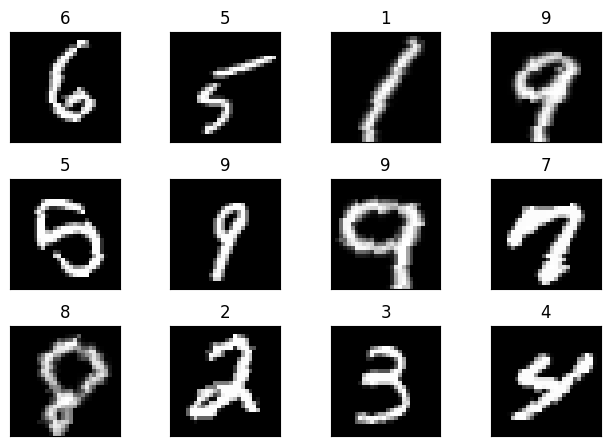

In [38]:
from Utilities.visualize import plot_data_samples, plot_class_label_counts

# plot_class_label_counts(train_loader)
plot_data_samples(train_loader)

In [39]:
model = Net1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_accs, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_accs, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 1


Train: Loss=0.1036 Batch_id=117 Accuracy=79.29: 100%|██████████| 118/118 [00:07<00:00, 16.76it/s]


Test set: Average loss: 0.1182, Accuracy: 9673/10000 (96.73%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 2


Train: Loss=0.1994 Batch_id=117 Accuracy=96.46: 100%|██████████| 118/118 [00:05<00:00, 21.40it/s]


Test set: Average loss: 0.0773, Accuracy: 9771/10000 (97.71%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 3


Train: Loss=0.0651 Batch_id=117 Accuracy=97.37: 100%|██████████| 118/118 [00:05<00:00, 20.66it/s]


Test set: Average loss: 0.0600, Accuracy: 9838/10000 (98.38%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 4


Train: Loss=0.0821 Batch_id=46 Accuracy=97.83:  40%|███▉      | 47/118 [00:02<00:04, 15.91it/s]


KeyboardInterrupt: 

**Target**
1. Set up a model structure, borrowed from previous exercise
2. Basic code from the previous exercise
3. CenterCrop as transform

**Results**
1. Train Acc: 99.31
2. Test Acc: 99.44
3. Parameters: 20k

**Analysis**
1. The model does achieve the target of 99.4% accuracy and is consistent too.
2. The model is under-fitting without any drop-out, our transform seems to be doing a good job making the training hard.
3. Let's see what the model can do with the least parameters setup.

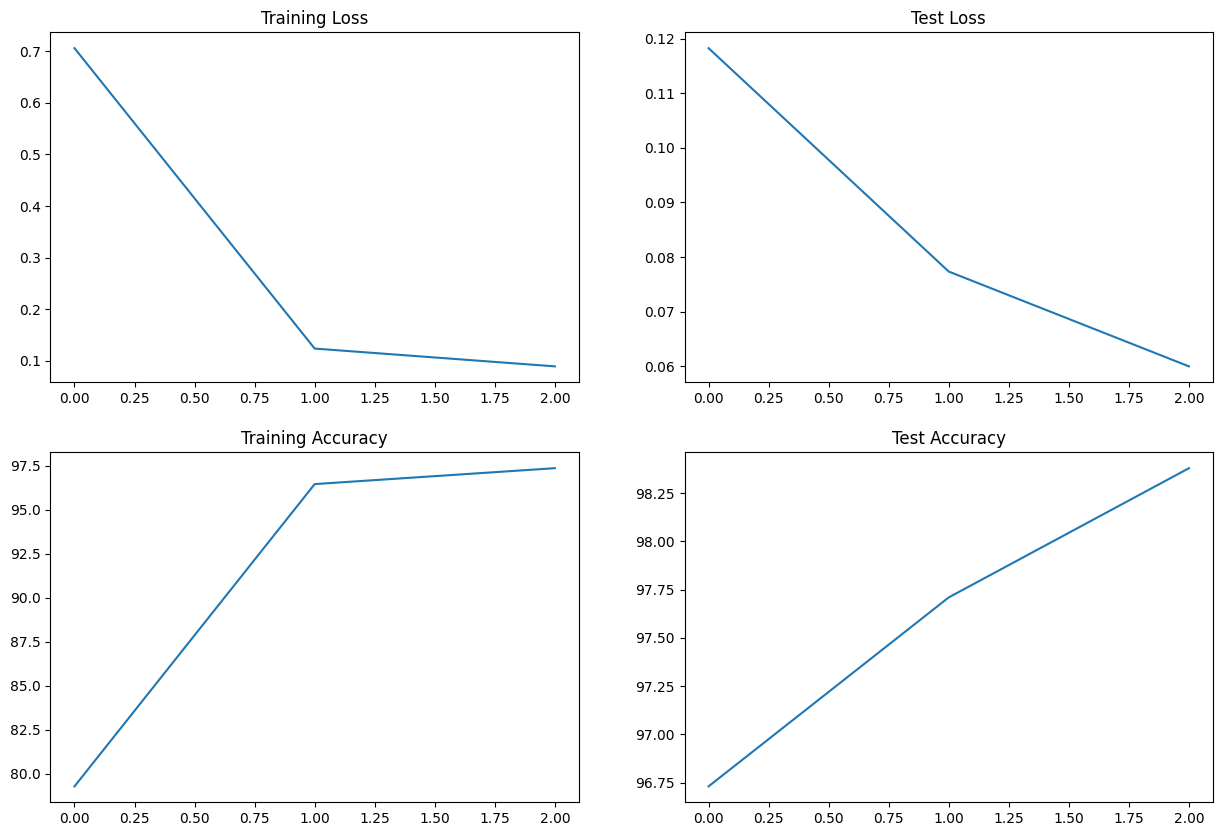

In [40]:
from Utilities.visualize import plot_model_training_curves

plot_model_training_curves(train_accs=train_accs, test_accs=test_accs, train_losses=train_losses, test_losses=test_losses)